In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
# Take in all of our wrestling data and read it into pandas
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
print(len(city_df))
print(len(ride_df))
print(ride_df.head())
print(city_df.head())

126
2375
          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673
             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban


In [3]:
ride_per_city_df = ride_df.groupby('city').fare.agg(['count','mean','sum'])
ride_per_city_df = ride_per_city_df.reset_index()

print(ride_per_city_df.head())

           city  count       mean     sum
0  Alvarezhaven     31  23.928710  741.79
1    Alyssaberg     26  20.609615  535.85
2    Anitamouth      9  37.315556  335.84
3  Antoniomouth     22  23.625000  519.75
4  Aprilchester     19  21.981579  417.65


In [11]:
city_ride_df = pd.merge(ride_per_city_df, city_df, how='left', on='city')
print(city_ride_df['count'].sum())
print(city_ride_df.head())

2407
           city  count       mean     sum  driver_count      type
0  Alvarezhaven     31  23.928710  741.79            21     Urban
1    Alyssaberg     26  20.609615  535.85            67     Urban
2    Anitamouth      9  37.315556  335.84            16  Suburban
3  Antoniomouth     22  23.625000  519.75            21     Urban
4  Aprilchester     19  21.981579  417.65            49     Urban


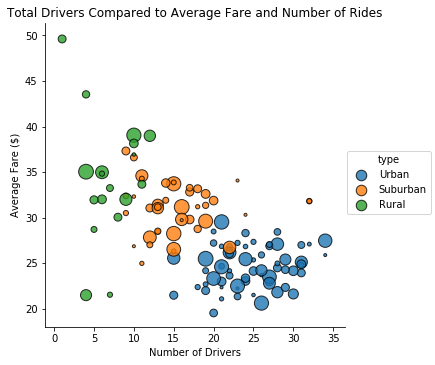

In [48]:
x_axis = city_ride_df['count']
average = city_ride_df['mean']
d_count = city_ride_df['driver_count']

sns.lmplot(x='count',y='mean',data=city_ride_df, hue='type', fit_reg=False, scatter_kws={'s': d_count*3, 'edgecolors':'black'})

#sns.boxplot
plt.title('Total Drivers Compared to Average Fare and Number of Rides')
plt.xlabel("Number of Drivers")
plt.ylabel('Average Fare ($)')
plt.show()